In [12]:
!pip3 install pretrainedmodels

You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
# Fast AI doesn't read in .jfif by default, so we need this.
#!sudo apt install imagemagick
!cd test; mogrify -format jpg *.jfif
!cd train/healthy_wheat; mogrify -format jpg *.jfif  
!cd train/leaf_rust; mogrify -format jpg *.jfif  
!cd train/stem_rust; mogrify -format jpg *.jfif

# Using Pretrainedmodels

In [2]:
import pretrainedmodels
import os

# Mount to Drive

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/bin/bash: line 0: cd: too many arguments


In [4]:
#cd gdrive/My\ Drive

/content/gdrive/My Drive


In [5]:
#cd ICLR/

/content/gdrive/My Drive/ICLR


In [3]:

os.listdir("train")

['stem_rust', 'leaf_rust', 'healthy_wheat']

In [4]:
os.listdir("train/healthy_wheat")[:10]

['QUBMQI.jpg',
 '6BNDTJ.jpg',
 'OV44OF.jpg',
 'U0P84E.jfif',
 'SVTYF9.jpg',
 '3C82ZM.jpg',
 'WGJ7NJ.jfif',
 '3FAKM2.jpg',
 '0PFX47.jpg',
 '5WTM0W.jpg']

In [8]:
os.listdir("test")[:10]

['ZOXDKA.jfif',
 '1R1HEY.JPG',
 'GU40NL.JPG',
 'AD54KD.jpg',
 '8NRRD6.jpg',
 '43AW2T.jfif',
 'OVOLCQ.JPG',
 'M9RQNE.jpg',
 'LT0KA0.jpg',
 'CA6QE3.jfif']

In [20]:
!pip install --upgrade fastai

  Using cached https://files.pythonhosted.org/packages/f5/e4/a7025bf28f303dbda0f862c09a7f957476fa92c9271643b4061a81bb595f/fastai-1.0.60-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/24/19/4804aea17cd136f1705a5e98a00618cb8f6ccc375ad8bfa437408e09d058/torch-1.4.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: torch 0.3.1
    Uninstalling torch-0.3.1:
      Successfully uninstalled torch-0.3.1
  Found existing installation: fastai 0.7.0
    Uninstalling fastai-0.7.0:
      Successfully uninstalled fastai-0.7.0
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import fastai
from fastai.imports import *

In [15]:
from fastai import *
from fastai.vision import *

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve

from math import floor

# Load the data

In [16]:
train_path = "train"
test_path = "test"
def get_labels(file_path): 
    dir_name = os.path.dirname(file_path)
    split_dir_name = dir_name.split("/")
    dir_levels = len(split_dir_name)
    label  = split_dir_name[dir_levels - 1]
    return(label)
from glob import glob
imagePatches = glob("train/*/*.*", recursive=True)
imagePatches[0:10]
path=""
from fastai.vision import *

In [4]:
get_labels("../input/train/train/healthy_wheat/'M9RQNE.jpg'")

'healthy_wheat'

In [19]:
path=""
from fastai.vision import *
# transform_kwargs = {"do_flip": True,
#                      "flip_vert": True}
# #                     "max_rotate": 180,
# #                     #"max_zoom": 1.1,
# #                     #"max_lighting": 0.2,
# #                     #"max_warp": 0.2,
# #                     #"p_affine": 0.75,
# #                     #"p_lighting": 0.7,
# #                     "xtra_tfms" : zoom_crop(scale=(0.5, 1.5), do_rand=True)}
        
# tfms = vision.get_transforms(**transform_kwargs)
tfms = get_transforms() 
data = ImageDataBunch.from_name_func(path, imagePatches, label_func=get_labels,  size=500, 
                                     bs=16,num_workers=0,test = test_path,ds_tfms=tfms
                                  ).normalize(imagenet_stats)

In [17]:
# data = ImageDataBunch.from_folder('', train = 'train', test = 'test', valid_pct= 0.2 , ds_tfms = get_transforms(), size = 500,bs= 16, num_workers=0).normalize(imagenet_stats)

In [21]:
#data.show_batch(rows=3, figsize=(8,8))


# Using se_resnext50_32x4d with the pretrained model

In [0]:
ath=""
import pretrainedmodels as pm
model_name = 'se_resnext50' # 'vgg_16_2'
# pretrained = 'imagenet' if pretrained else None
_base_arch = lambda arg: pm.se_resnext50_32x4d(pretrained= 'imagenet')
learner = vision.cnn_learner(data, 
                             base_arch = _base_arch, 
                             pretrained = True, 
                             metrics = accuracy).mixup()

# first model name 'model-501'

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


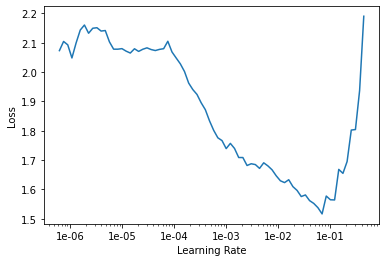

In [16]:
learner.lr_find()
learner.recorder.plot()

In [17]:
learner.unfreeze()
lr=2e-4
learner.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.319842,0.539881,0.784810,05:34
1,0.872610,0.683714,0.848101,04:04
2,0.632147,0.442271,0.881857,04:01
3,0.419122,0.534777,0.848101,03:59
4,0.334990,0.437540,0.886076,03:58


In [0]:
learner.save('model-last-501')

In [19]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('leaf_rust', 'stem_rust', 10),
 ('stem_rust', 'leaf_rust', 6),
 ('healthy_wheat', 'leaf_rust', 5),
 ('healthy_wheat', 'stem_rust', 4)]

#  load the first model and run it again 'model-502'

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


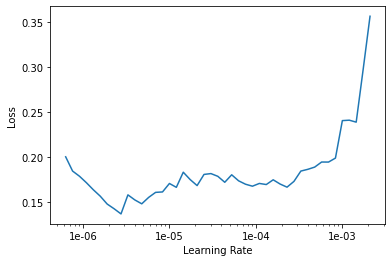

In [21]:
learner.lr_find()
learner.recorder.plot()

In [22]:
learner.load('model-last-501')
learner.unfreeze()
learner.fit_one_cycle(10,2e-6)


epoch,train_loss,valid_loss,accuracy,time
0,0.217168,0.441023,0.881857,03:59
1,0.240596,0.443933,0.898734,03:58
2,0.256892,0.417599,0.894515,04:00
3,0.256890,0.431598,0.902954,04:00
4,0.222888,0.411642,0.890295,04:01
5,0.240508,0.432184,0.877637,04:02
6,0.190731,0.442515,0.894515,04:03
7,0.218803,0.435537,0.898734,04:02
8,0.201634,0.428105,0.894515,04:00
9,0.181793,0.438721,0.873418,03:59


In [0]:
learner.save('model-last-502')

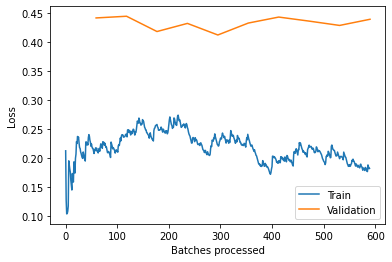

In [24]:
learner.recorder.plot_losses()

In [25]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('stem_rust', 'leaf_rust', 14),
 ('healthy_wheat', 'leaf_rust', 6),
 ('leaf_rust', 'stem_rust', 5),
 ('healthy_wheat', 'stem_rust', 3)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


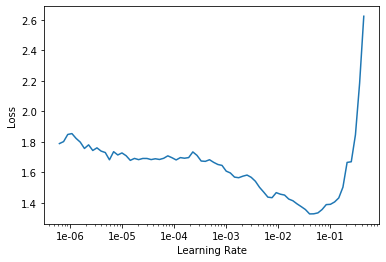

In [0]:
learner.lr_find()
learner.recorder.plot()

In [0]:
learner.load('model-last-502')
learner.unfreeze()
lr = 2e-5
learner.fit_one_cycle(6, lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.801992,1.079276,0.493671,03:49
1,1.486156,0.722278,0.679325,03:43
2,1.223843,0.546005,0.797468,03:43
3,1.001203,0.465972,0.835443,03:46
4,0.864730,0.459627,0.818565,03:46
5,0.835093,0.461001,0.822785,03:45


In [0]:
learner.save('model-last-503')

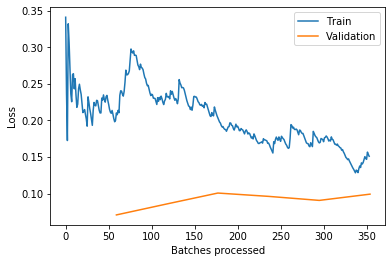

In [0]:
learner.recorder.plot_losses()

In [0]:
interp = ClassificationInterpretation.from_learner(learner)
interp.most_confused(min_val=2)

[('leaf_rust', 'stem_rust', 3), ('stem_rust', 'leaf_rust', 2)]

# submit 'model-502' 

In [0]:
#learner.recorder.plot_losses()

In [0]:
learner.load('model-502')

interp = ClassificationInterpretation.from_learner(learner)

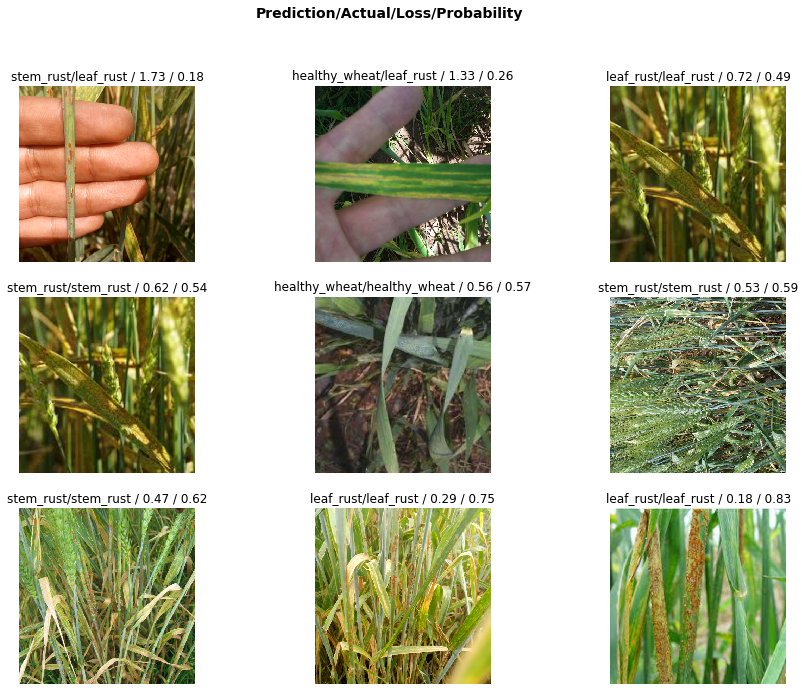

In [0]:
interp.plot_top_losses(9, figsize=(15,11))


In [0]:
#interp = ClassificationInterpretation.from_learner(learner)
interp.most_confused(min_val=2)


[]

In [0]:
import os
preds,y = learner.TTA(ds_type=DatasetType.Test)

submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

,ID,leaf_rust,stem_rust,healthy_wheat
0,SS11ZQ,0.022007,0.970436,0.007557
1,GU40NL,0.002882,0.996965,0.000153
2,ROPN18,0.008736,0.974651,0.016612
3,99LHT9,0.016020,0.968035,0.015946
4,AD54KD,0.561924,0.362609,0.075467


In [0]:
submission.to_csv("resnet50-model502-secondround.csv", index=False)

# submit 'model-503'

In [0]:
learner.load('model-503')
#learner.export()
#learner.recorder.plot_losses()

Learner(data=ImageDataBunch;

Train: LabelList (952 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
stem_rust,stem_rust,stem_rust,stem_rust,stem_rust
Path: .;

Valid: LabelList (237 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
leaf_rust,stem_rust,leaf_rust,stem_rust,healthy_wheat
Path: .;

Test: LabelList (610 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: EmptyLabelList
,,,,
Path: ., model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mod

In [0]:
interp = ClassificationInterpretation.from_learner(learner)
interp.most_confused(min_val=2)

[('leaf_rust', 'stem_rust', 2)]

In [0]:
preds,y = learner.TTA(ds_type=DatasetType.Test)
import os

submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()


,ID,leaf_rust,stem_rust,healthy_wheat
0,SS11ZQ,0.048676,0.939649,0.011675
1,GU40NL,0.002800,0.996724,0.000477
2,ROPN18,0.068828,0.907479,0.023694
3,99LHT9,0.038478,0.941145,0.020377
4,AD54KD,0.720895,0.219673,0.059432


In [0]:
submission.to_csv("resnet50-model503.csv", index=False)

# using model_502 to do model504

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


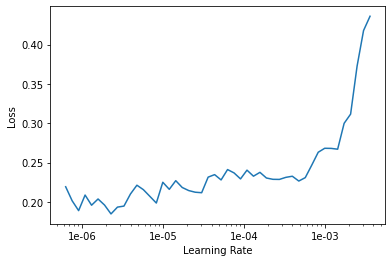

In [27]:
learner.load('model-last-502')
learner.lr_find()
learner.recorder.plot()

In [28]:
learner.load('model-last-502')
learner.unfreeze()
learner.fit_one_cycle(6, 2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.215431,0.426181,0.894515,04:03
1,0.223793,0.451524,0.881857,04:00
2,0.200611,0.444536,0.890295,03:59
3,0.175211,0.420506,0.898734,03:59
4,0.132239,0.445054,0.894515,04:00
5,0.131884,0.435418,0.894515,04:00


In [0]:
learner.save('model-last-504')

In [31]:
learner.load('model-last-504')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('stem_rust', 'leaf_rust', 9),
 ('leaf_rust', 'stem_rust', 6),
 ('healthy_wheat', 'leaf_rust', 5),
 ('healthy_wheat', 'stem_rust', 4)]

In [0]:
#learner.recorder.plot_losses()

In [0]:
preds,y = learner.TTA(ds_type=DatasetType.Test)
import os

submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()


,ID,leaf_rust,stem_rust,healthy_wheat
0,SS11ZQ,0.005423,0.990750,0.003828
1,GU40NL,0.001363,0.998025,0.000612
2,ROPN18,0.000988,0.993506,0.005506
3,99LHT9,0.000263,0.982715,0.017022
4,AD54KD,0.508580,0.460125,0.031295


In [0]:
submission.to_csv("resnet50-model504.csv", index=False)

# using mode504 to do model-505

In [0]:
tfms = get_transforms() 
data = ImageDataBunch.from_name_func(path, imagePatches, label_func=get_labels,  size=520, 
                                     bs=8,num_workers=0,test = test_path,ds_tfms=tfms
                                  ).normalize(imagenet_stats)

In [0]:
# def se_resnext50_32x4d(pretrained=False):
#     pretrained = 'imagenet' if pretrained else None
#     model = pretrainedmodels.se_resnext50_32x4d(pretrained=pretrained)
#     return model
import pretrainedmodels as pm
model_name = 'se_resnext50' # 'vgg_16_2'
# pretrained = 'imagenet' if pretrained else None
_base_arch = lambda arg: pm.se_resnext50_32x4d(pretrained='imagenet')
learner = vision.cnn_learner(data, 
                             base_arch = _base_arch, 
                             pretrained = True, 
                             metrics = accuracy)


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


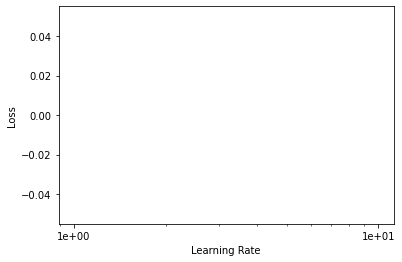

In [35]:
learner.load('model-last-504')
learner.lr_find()
learner.recorder.plot()

In [36]:
learner.load('model-last-504')
learner.unfreeze() 
learner.fit_one_cycle(6, 2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.367344,0.111842,0.970464,04:18
1,0.335481,0.121676,0.970464,04:16
2,0.343367,0.143699,0.953587,04:18
3,0.348953,0.119232,0.962025,04:18
4,0.316263,0.110042,0.966245,04:16
5,0.263408,0.119893,0.966245,04:17


In [37]:
learner.save('model-last-505')
learner.unfreeze()
learner.load('model-last-505')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('stem_rust', 'leaf_rust', 4), ('healthy_wheat', 'leaf_rust', 2)]

In [0]:
preds,y = learner.TTA(ds_type=DatasetType.Test)
import os

submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

In [0]:
submission.to_csv("resnet50-model505.csv", index=False)

# using model 505 with imgsize 520 and bs =8

In [40]:
learner.load('model-last-505')
learner.unfreeze()
learner.fit_one_cycle(10, 2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.257523,0.122823,0.970464,04:13
1,0.269515,0.105695,0.962025,04:12
2,0.312999,0.111917,0.962025,04:13
3,0.254656,0.138020,0.945148,04:12
4,0.244142,0.145859,0.957806,04:14
5,0.276912,0.135279,0.962025,04:12
6,0.228029,0.142795,0.953587,04:13
7,0.220482,0.173138,0.962025,04:12
8,0.223582,0.160378,0.962025,04:12
9,0.217990,0.153028,0.962025,04:13


In [41]:
learner.save('model-last-506')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('stem_rust', 'leaf_rust', 5), ('leaf_rust', 'stem_rust', 2)]

In [0]:
preds,y = learner.TTA(ds_type=DatasetType.Test)
import os

submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

In [0]:
submission.to_csv("resnet50-model506.csv", index=False)

# continue training 

In [0]:
learner.load('model-last-506')
learner.unfreeze()
learner.fit_one_cycle(8, 2e-5)

In [0]:
learner.save('model-last-508')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)
preds8,y = learner.TTA(ds_type=DatasetType.Test) 

In [0]:
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds8[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()
submission.to_csv("resnet50-model508.csv", index=False)

In [0]:
learner.load('model-last-508')
learner.unfreeze()
learner.fit_one_cycle(10, 2e-5)
learner.save('model-last-509')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

In [0]:
reds9,y = learner.TTA(ds_type=DatasetType.Test)
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = reds5[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()
submission.to_csv("resnet50-model509.csv", index=False)

# Ensamble method

In [42]:
learner.unfreeze()
learner.load('model-last-502')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('healthy_wheat', 'leaf_rust', 3), ('stem_rust', 'leaf_rust', 3)]

In [0]:
preds2,y = learner.TTA(ds_type=DatasetType.Test)

In [43]:
learner.unfreeze()
learner.load('model-last-504')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('healthy_wheat', 'leaf_rust', 2),
 ('leaf_rust', 'stem_rust', 2),
 ('stem_rust', 'leaf_rust', 2)]

In [0]:
preds4,y = learner.TTA(ds_type=DatasetType.Test)


In [44]:
learner.unfreeze()
learner.load('model-last-505')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('stem_rust', 'leaf_rust', 4), ('healthy_wheat', 'leaf_rust', 2)]

In [0]:
preds5,y = learner.TTA(ds_type=DatasetType.Test)


In [45]:
learner.unfreeze()
learner.load('model-last-506')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('stem_rust', 'leaf_rust', 5), ('leaf_rust', 'stem_rust', 2)]

In [0]:
preds6,y = learner.TTA(ds_type=DatasetType.Test)


In [46]:
learner.unfreeze()
learner.load('model-last-508')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

FileNotFoundError: ignored

In [0]:
preds8,y = learner.TTA(ds_type=DatasetType.Test)


In [0]:
learner.unfreeze()
learner.load('model-last-509')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

In [0]:
preds9,y = learner.TTA(ds_type=DatasetType.Test)


In [0]:
#preds,y = learner.TTA(ds_type=DatasetType.Test)

In [0]:
preds = ( preds4 + preds5 + preds6 )/3

In [0]:
import os

submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

,ID,leaf_rust,stem_rust,healthy_wheat
0,SS11ZQ,0.001352,0.991395,0.007253
1,GU40NL,0.000277,0.999261,0.000462
2,ROPN18,0.009720,0.989176,0.001104
3,99LHT9,0.014137,0.912292,0.073571
4,AD54KD,0.334152,0.656587,0.009261


In [0]:
submission.to_csv("resnet50-model546.csv", index=False)

In [0]:
preds = ( preds4 + preds5 + preds6 + preds8 +preds9)/5

In [0]:
import os

submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

In [0]:
submission.to_csv("resnet50-model-averageall.csv", index=False)

# train resnet34

In [0]:
!pip3 install pydicom
!pip3 install pretrainedmodels 


     |████████████████████████████████| 35.1MB 88kB/s 
     |████████████████████████████████| 61kB 2.0MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60962 sha256=f01ba2917624027a8f947ae3121c8ad135a62ddcd8ced179c07587ebc78c7162
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built pretrainedmodels


In [0]:
import numpy as np
import pandas as pd
import os
import fastai
from fastai.vision import *
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt  
import pydicom
import torchvision.models as models
from tqdm import tqdm
from glob import glob
from fastai.vision import *
number_epochs=5
import pretrainedmodels as pm

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')
#json_file = '/content/gdrive/My Drive/Colab Notebooks/data/kaggle.json'


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
cd ICLR/

/content/gdrive/My Drive/ICLR


In [0]:

!pip3 install pydicom

In [0]:
train_path = "train"
test_path = "test"
def get_labels(file_path): 
    dir_name = os.path.dirname(file_path)
    split_dir_name = dir_name.split("/")
    dir_levels = len(split_dir_name)
    label  = split_dir_name[dir_levels - 1]
    return(label)
imagePatches = glob("train/*/*.*", recursive=True)
imagePatches[0:10]
path=""
tfms = get_transforms()

In [0]:
# data

In [0]:
data = ImageDataBunch.from_name_func(path, imagePatches, label_func=get_labels,  size=224, 
                                  bs=16,num_workers=0,test = test_path,ds_tfms=tfms
                              ).normalize(imagenet_stats)


In [0]:
# learn = cnn_learner(data, base_arch= , metrics=[accuracy])

In [0]:
_base_arch = lambda arg: pm.se_resnext50_32x4d(pretrained='imagenet')
learn50 = vision.cnn_learner(data, 
                             base_arch = _base_arch, 
                             pretrained = True, 
                             metrics = accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


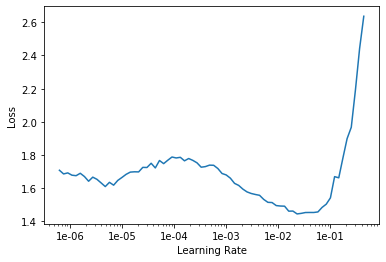

In [0]:
learn50.lr_find()
learn50.recorder.plot()

In [0]:
learn50.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,1.278485,0.719470,0.772152,04:43
1,1.078086,0.581459,0.835443,02:30
2,0.848679,0.518269,0.810127,02:29
3,0.583347,0.414319,0.839662,02:28
4,0.518862,0.275908,0.890295,02:28
5,0.405811,0.279405,0.881857,02:28
6,0.361004,0.299607,0.898734,02:31
7,0.368741,0.259020,0.898734,02:26


In [0]:
learn50.save('stage-1-50')

In [0]:
learn50.load('stage-1-50')
learn50.unfreeze()
learn50.fit_one_cycle(5, 2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.351677,0.253767,0.907173,02:35
1,0.277138,0.243361,0.928270,02:32
2,0.277590,0.197830,0.924051,02:33
3,0.257211,0.222787,0.928270,02:32
4,0.227819,0.197416,0.932489,02:33


In [0]:
# learn50.load('stage-1-50')

# submission

In [0]:
preds, test_labels = learn50.get_preds(ds_type=DatasetType.Test)

In [0]:
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learn50.data.classes):
  submission[c] = preds[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

,ID,leaf_rust,stem_rust,healthy_wheat
0,SS11ZQ,0.267580,0.712978,0.019442
1,GU40NL,0.011234,0.984456,0.004311
2,ROPN18,0.015238,0.984125,0.000637
3,99LHT9,0.001208,0.997912,0.000880
4,AD54KD,0.065004,0.901915,0.033081


In [0]:
submission.to_csv('submission_fastai.csv', index=False)



# increasing resolution

In [0]:
size = [224, 232, 248, 256, 272]
def get_data(sz, bs):
  data = ImageDataBunch.from_name_func(path, imagePatches, label_func=get_labels,  size=sz, 
                                  bs=bs,num_workers=0,test = test_path,ds_tfms=tfms
                              ).normalize(imagenet_stats)
  return data

# Using Default LR

In [0]:
learn50 = cnn_learner(get_data(8, int(2048/8)), models.resnet50, metrics=error_rate)
learn50.save('res50_0')
learn50.save('res50_224')
learn50 = cnn_learner(get_data(16, int(2048/16)), models.resnet50, metrics=error_rate).load('res50_224')
learn50.save('res50_232')
learn50 = cnn_learner(get_data(24, int(2048/24)), models.resnet50, metrics=error_rate).load('res50_232')
learn50.save('res50_240')
learn50 = cnn_learner(get_data(32, int(2048/32)), models.resnet50, metrics=error_rate).load('res50_240')
learn50.save('res50_248')
learn50 = cnn_learner(get_data(64, int(2048/64)), models.resnet50, metrics=error_rate).load('res50_248')
learn50.save('res50_256')
learn50 = cnn_learner(get_data(128, int(2048/128)), models.resnet50, metrics=error_rate).load('res50_256')
learn50.save('res50_264')
learn50 = cnn_learner(get_data(224, int(2048/224)), models.resnet50, metrics=error_rate).load('res50_264')
learn50.save('res50_272')

In [0]:
def train_model(sz, i):
  learn50 = cnn_learner(get_data(sz, int(2048/sz)), models.resnet50, metrics=[error_rate, accuracy]).load('res50_'+str(sz-8))
  learn50.fit_one_cycle(6*i)
  learn50.lr_find()
  learn50.recorder.plot()
  learn50.unfreeze()
  learn50.fit_one_cycle(2*i)
  learn50.save('res50_'+str(sz))

In [0]:
# ens = get_ensemble(3) # ens is a list type of object which will contain my three learnt model

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.397560,1.036695,0.274262,0.725738,03:10
1,1.055865,0.844410,0.282700,0.717300,03:07
2,0.781577,0.527121,0.202532,0.797468,03:08
3,0.608485,0.534449,0.227848,0.772152,03:05
4,0.489580,0.476474,0.198312,0.801688,03:05
5,0.477196,0.454423,0.172996,0.827004,03:03


epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.958605,0.803396,0.248945,0.751055,03:11
1,0.624476,0.479108,0.177215,0.822785,03:13


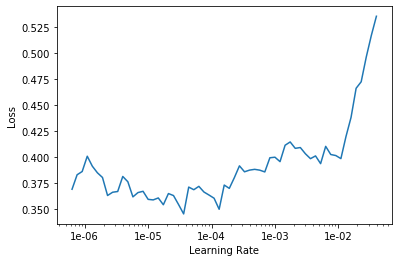

In [0]:
train_model(224, 1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.516800,0.303924,0.118143,0.881857,03:13
1,0.557144,0.355389,0.118143,0.881857,03:08
2,0.573172,0.331778,0.122363,0.877637,03:07
3,0.567265,0.312790,0.113924,0.886076,03:07
4,0.605240,0.328556,0.143460,0.856540,03:07
5,0.465282,0.303677,0.118143,0.881857,03:09
6,0.440826,0.300719,0.135021,0.864979,03:06
7,0.450685,0.301495,0.101266,0.898734,03:05
8,0.418547,0.267692,0.109705,0.890295,03:06
9,0.431828,0.269045,0.101266,0.898734,03:07


epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.604969,0.656495,0.177215,0.822785,03:16
1,0.806801,0.507681,0.185654,0.814346,03:14
2,0.673181,0.496214,0.151899,0.848101,03:15
3,0.588880,0.438568,0.147679,0.852321,03:13


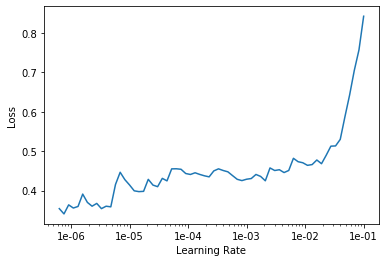

In [0]:
train_model(232, 2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.507025,0.235738,0.067511,0.932489,03:07
1,0.530476,0.243995,0.067511,0.932489,03:08
2,0.556603,0.231162,0.063291,0.936709,03:06
3,0.604715,0.316881,0.088608,0.911392,03:05
4,0.585242,0.264848,0.071730,0.928270,03:04
5,0.513649,0.222538,0.071730,0.928270,03:04
6,0.566236,0.239648,0.071730,0.928270,03:04
7,0.521311,0.289115,0.101266,0.898734,03:05
8,0.546785,0.227931,0.071730,0.928270,03:06
9,0.512967,0.197643,0.063291,0.936709,03:04


epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.407192,0.377312,0.139241,0.860759,03:14
1,0.750460,0.706404,0.286920,0.713080,03:14
2,0.748193,0.615364,0.227848,0.772152,03:17
3,0.603666,0.434417,0.151899,0.848101,03:15
4,0.542178,0.449066,0.160338,0.839662,03:14
5,0.436576,0.435830,0.160338,0.839662,03:14


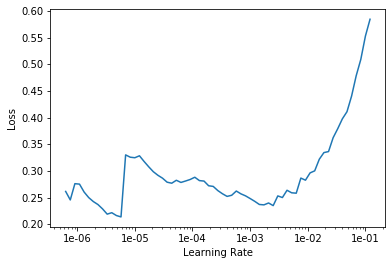

In [0]:
train_model(240,3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.459951,0.630065,0.151899,0.848101,15:19
1,0.465433,0.474909,0.168776,0.831224,15:19
2,0.467240,0.834491,0.151899,0.848101,15:18
3,0.497548,0.769334,0.118143,0.881857,15:17
4,0.478546,0.325955,0.084388,0.915612,15:20
5,0.451702,0.361178,0.118143,0.881857,15:13
6,0.411781,0.826306,0.160338,0.839662,15:08
7,0.418782,0.666972,0.113924,0.886076,15:11
8,0.381539,0.514130,0.092827,0.907173,15:06
9,0.353356,0.310784,0.088608,0.911392,15:08


epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.527150,1.783711,0.324895,0.675106,19:48
1,0.566235,0.874170,0.177215,0.822785,19:52
2,0.566915,0.386946,0.118143,0.881857,19:49
3,0.456192,0.338381,0.130802,0.869198,19:46


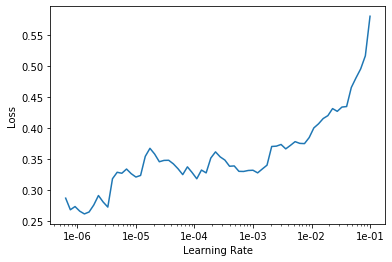

In [0]:
train_model(248, 2)

In [0]:
interpreter = ClassificationInterpretation.from_learner(learn50)
interpreter.most_confused(min_val=2)

[('leaf_rust', 'healthy_wheat', 53),
 ('stem_rust', 'healthy_wheat', 51),
 ('leaf_rust', 'stem_rust', 34),
 ('healthy_wheat', 'stem_rust', 14),
 ('healthy_wheat', 'leaf_rust', 10),
 ('stem_rust', 'leaf_rust', 9)]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.401742,0.305833,0.088608,0.911392,16:00
1,0.424522,0.316606,0.126582,0.873418,15:58
2,0.458012,0.326244,0.139241,0.860759,16:02
3,0.418020,0.303728,0.097046,0.902954,15:46
4,0.386903,0.295400,0.092827,0.907173,15:40
5,0.429133,0.299974,0.084388,0.915612,15:43
6,0.412115,0.288938,0.097046,0.902954,15:41
7,0.428840,0.293635,0.088608,0.911392,15:44
8,0.455398,0.286983,0.092827,0.907173,15:43
9,0.410268,0.297627,0.097046,0.902954,15:38


epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.418924,0.282239,0.084388,0.915612,20:07
1,0.453940,0.282029,0.101266,0.898734,20:09
2,0.391708,0.288938,0.097046,0.902954,20:07
3,0.387722,0.269017,0.080169,0.919831,20:11


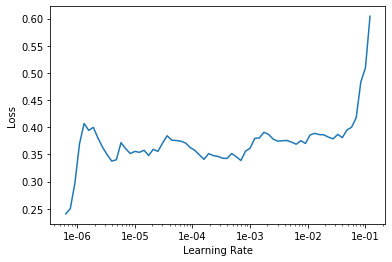

In [0]:
sz = 256
i = 2
learn50 = cnn_learner(get_data(sz, int(2048/sz)), models.resnet50, metrics=[error_rate, accuracy]).load('res50_248')
learn50.fit_one_cycle(6*i, 2e-5)
learn50.lr_find()
learn50.recorder.plot()
learn50.unfreeze()
learn50.fit_one_cycle(2*i, 2e-5)
learn50.save('res50_'+str(sz))

In [0]:
interpreter = ClassificationInterpretation.from_learner(learn50)
interpreter.most_confused(min_val=2)

[('leaf_rust', 'stem_rust', 10),
 ('stem_rust', 'leaf_rust', 10),
 ('healthy_wheat', 'stem_rust', 5),
 ('leaf_rust', 'healthy_wheat', 3)]

In [0]:
learn50 = cnn_learner(get_data(420, 18), models.resnet50, metrics=error_rate).load('res50_256')
#learn50.save('best_420') 
learn50.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time


RuntimeError: ignored

In [0]:
sz = 420; i = 6
learn50 = vision.cnn_learner(get_data(sz, 18), models.resnet50, metrics=[error_rate, accuracy], 
                      callbacks=[SaveModelCallback(learn50, every='improvement', monitor='accuracy', name='best_420')])#.load('res50_256')


In [0]:
train_model(sz,2)

FileNotFoundError: ignored

In [0]:
learn50 = cnn_learner(get_data(sz, int(2048/sz)), models.resnet50, metrics=[error_rate, accuracy]).load('res50_248')
learn50.unfreeze()
learn50.fit_one_cycle(10) #2*i)
learn50.save('res50_'+str(sz))

epoch,train_loss,valid_loss,error_rate,accuracy,time


RuntimeError: ignored

In [0]:
sz = 500; i = 7
learn50.load('best_224')
learn50.fit_one_cycle(2*i)
learn50.save('res50_'+str(sz))

# submission

In [0]:
learn50.load('best_224_1')
preds, test_labels = learn50.get_preds(ds_type=DatasetType.Test)

In [0]:
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learn50.data.classes):
  submission[c] = preds[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

In [0]:
submission.to_csv('submission_fastai_res50.csv', index=False)

# mixup

In [0]:
# learn50 = cnn_learner(get_data(224, 64), models.resnet50, metrics=[error_rate, accuracy], callbacks=[SaveModelCallback(learn50, every='improvement'
#             , monitor='accuracy', name='best_224_mixup')]).load('res50_224').mixup()

In [0]:
# learn50.fit(8)

In [0]:
# learn50.save('mixup_8')
# learn50.fit(5)
# learn50.save('mixup_5')

In [0]:
# learn50.unfreeze()
# learn50.fit_one_cycle(5)

In [0]:
# log_preds, test_labels = learn50.get_preds(ds_type=DatasetType.Test)

In [0]:
# submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
# for i, c in enumerate(learn50.data.classes):
#   submission[c] = preds[:,i]

# submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
# submission.head()

In [0]:
# submission.to_csv('submission_fastai_res50_mixup.csv', index=False)